Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 638 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 12770 transaction(s)] done [0.00s].
sorting and recoding items ... [15 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 50 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
14 33  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    3.00    2.78    3.00    4.00 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.05098   Min.   :0.5005   Min.   :0.06171   Min.   :1.035  
 1st Qu.:0.06124   1st Qu.:0.6245   1st Qu.:0.07723   1st Qu.:1.573  
 Median :0.06954   Median :0.7394   Median :0.09683   Median :2.413  
 Mean   :0.10363   Mean   :0.7406   Mean   :0.14802   Mean   :2.172  
 3rd Qu.:0.14052   3rd Qu.:0.8362   3rd Qu.:0.23522   3rd Qu.:2.634  
 Max.   :0.25059   Max.   :0.9943   Max.   :0.36993   Max.   :3.671  
     count     
 Min.   : 651  
 1st Qu.: 782  
 Median : 888  
 Mean   :1323  
 3rd Qu.:1794  
 Max.   :3200  

mining info:
     data ntransactions support confidence
 df_trans         12770    0.05        0.5
                                                                                         

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


png 
  2

Top 15 Rules Sorted by Support:
     lhs                         rhs          support   confidence coverage 
[1]  {Small Rise}             => {Small Gain} 0.2505873 0.9111617  0.2750196
[2]  {Small Gain}             => {Small Rise} 0.2505873 0.6773920  0.3699295
[3]  {Small Drop}             => {Small Loss} 0.2376664 0.9177502  0.2589663
[4]  {Small Loss}             => {Small Drop} 0.2376664 0.6750445  0.3520752
[5]  {Small Gain}             => {Tech}       0.2061081 0.5571550  0.3699295
[6]  {Low}                    => {Tech}       0.1953015 0.7813283  0.2499608
[7]  {Small Loss}             => {Tech}       0.1822240 0.5175712  0.3520752
[8]  {Small Rise}             => {Tech}       0.1672670 0.6082005  0.2750196
[9]  {Small Drop}             => {Tech}       0.1475333 0.5697006  0.2589663
[10] {Small Rise, Small Gain} => {Tech}       0.1469068 0.5862500  0.2505873
[11] {Small Rise, Tech}       => {Small Gain} 0.1469068 0.8782772  0.1672670
[12] {Small Gain, Tech}       => {Small Rise

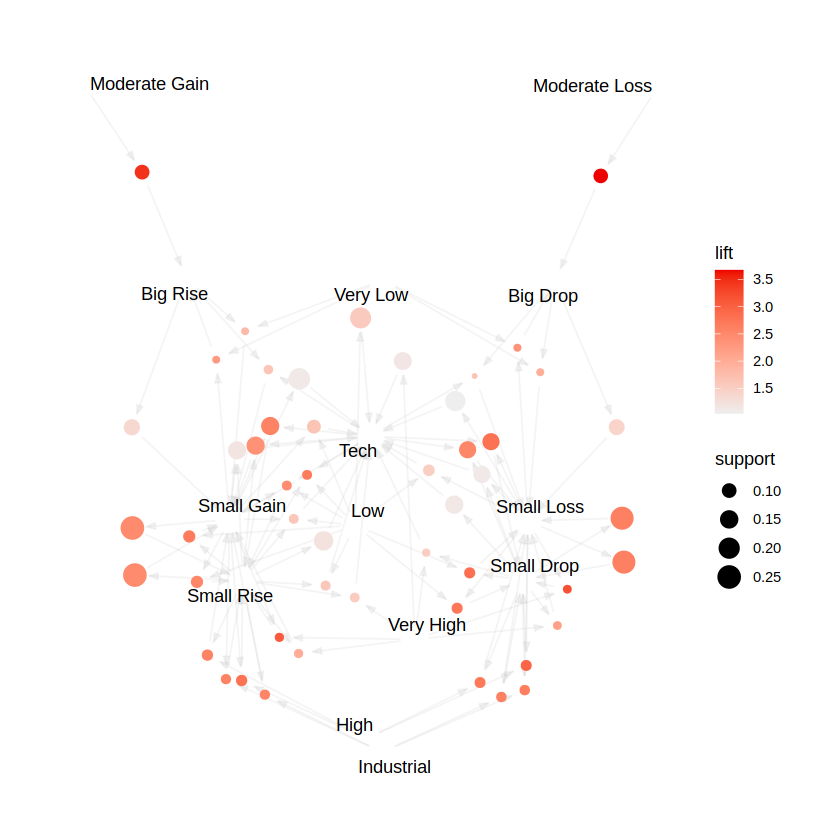

In [1]:
install.packages("arules", repos = "http://cloud.r-project.org")
install.packages("arulesViz", repos = "http://cloud.r-project.org")
install.packages("visNetwork", repos = "http://cloud.r-project.org")
install.packages("htmlwidgets", repos = "http://cloud.r-project.org")

library(arules)
library(arulesViz)
library(visNetwork)
library(htmlwidgets)

data_path <- "ARM_data.csv"
df <- read.csv(data_path, header = FALSE, stringsAsFactors = TRUE)

colnames(df) <- as.character(unlist(df[1, ]))
df <- df[-1, ]

df_trans <- as(df, "transactions")

colnames(df_trans) <- gsub(".*=", "", colnames(df_trans))

rules <- apriori(df_trans, parameter = list(supp = 0.05, conf = 0.5, minlen = 2, target = "rules"))

summary(rules)

plot(rules, method = "graph", control = list(type = "items"))

png("ARM_Network_Cleaned.png", width = 1000, height = 800)
plot(rules, method = "graph", control = list(type = "items"))
dev.off()

top15_support <- head(sort(rules, by = "support", decreasing = TRUE), 15)
cat("Top 15 Rules Sorted by Support:\n")
inspect(top15_support)

top15_confidence <- head(sort(rules, by = "confidence", decreasing = TRUE), 15)
cat("\nTop 15 Rules Sorted by Confidence:\n")
inspect(top15_confidence)

top15_lift <- head(sort(rules, by = "lift", decreasing = TRUE), 15)
cat("\nTop 15 Rules Sorted by Lift:\n")
inspect(top15_lift)

interactive_plot <- plot(top15_lift, method = "graph", engine = "htmlwidget")
htmlwidgets::saveWidget(interactive_plot, "ARM_Network_Interactive.html", selfcontained = TRUE)
